In [1]:
import tweepy
import time
import csv
import pandas as pd

consumer_key= 'insert'
consumer_secret= 'insert'
access_token= 'insert'
access_token_secret= 'insert'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [40]:
limit = 5000
language = 'en' 
keywords = 'Beyoncé OR #renaissance'
startDate = "2022-07-29"
endDate = "2022-07-31"



# Passing the parameters into the Cursor constructor method
public_tweets = tweepy.Cursor( api.search,
                                q= keywords,
                                result_type='recent',
                                since = startDate,
                                until = endDate,
                                count=100,
                                include_entities=True,
                                lang=language,
                                tweet_mode="extended",
                                encoding='utf-8-sig').items(limit)

In [41]:
tweet_id_list = []
tweet_text_list = []
tweet_location_list = []
user_screen_name_list = []
tweet_created_list = []
tweet_contributors_list = []
tweet_retweet_count_list = []
tweet_source_list = []
tweet_username_list = []


# Iterating through the results to extract the results
for tweet in public_tweets:
    tweet_id_list.append(tweet.id)
    tweet_text_list.append(tweet.full_text)
    tweet_location_list.append(tweet.user.location)
    user_screen_name_list.append(tweet.user.screen_name)
    tweet_source_list.append(tweet.source)
    tweet_created_list.append(tweet.created_at)
    tweet_contributors_list.append(tweet.id_str)
    tweet_retweet_count_list.append(tweet.retweet_count)
    tweet_username_list.append(tweet.user.name)

# Creating a Pandas dataframe to organize the data into a table
df = pd.DataFrame({
    'tweet_id': tweet_id_list,
    'tweet_text': tweet_text_list,
    'tweet_location': tweet_location_list,
    'user_screen': user_screen_name_list,
    'tweet_source': tweet_source_list,
    'tweet_created': tweet_created_list,
    'tweet_contributors': tweet_contributors_list,
    'tweet_retweet_count': tweet_retweet_count_list,
    'tweet_username': tweet_username_list})

In [44]:
def cleanUpTweet(txt):
  txt = re.sub(r'@[A-Za-z0-9_]+', '',txt)
  txt = re.sub(r'#', '', txt)
  txt = re.sub(r'https?:\/\/[A-Aa-a0-9\.\/]+', '', txt)
  return txt

In [50]:
df.head(100)

,tweet_id,tweet_text,tweet_location,user_screen,tweet_source,tweet_created,tweet_contributors,tweet_retweet_count,tweet_username
0,1553530880395776000,When Beyoncé says “deadass” 3x in a row… chills,Moody's Point,megundo_o,Twitter for iPhone,2022-07-30 23:59:59,1553530880395776000,0,Nosie Perez 💁🏻‍♀️
1,1553530879364022272,@beyonceaccess @OnAirRomeo @JayMacRadio @t_bra...,"Sousa, Paraiba Brasil",Regiicarlos,Twitter for Android,2022-07-30 23:59:59,1553530879364022272,0,Carlinhos 🌵
2,1553530879196233728,one time i said i wanted to smoke with Beyoncé...,,xlove_delilahx,Twitter for iPhone,2022-07-30 23:59:59,1553530879196233728,0,Syd💕
3,1553530878927802368,RT @rumiyonce: the ending of heated &gt;&gt;&g...,france,smokencottin,Twitter for iPad,2022-07-30 23:59:59,1553530878927802368,7444,high fem kese
4,1553530876473921541,ALIEN SUPERSTAR 🛸👽🌟🪩 #RENAISSANCE https://t.co...,Moonside,pk_kenzie,Twitter Web App,2022-07-30 23:59:58,1553530876473921541,14,kenzie
...,...,...,...,...,...,...,...,...,...
95,1553530772790734848,RT @MrBeyFan: Alien Superstar being a BEYONCÉ ...,Baltimore ✈ Charlotte ✈️ SF,iAm_KJayy,Twitter for iPhone,2022-07-30 23:59:34,1553530772790734848,1845,K.
96,1553530771964559361,RT @TheBlackLayers: This black owned cafe I’m ...,Mariana Trench,auntysaturn,Twitter for iPhone,2022-07-30 23:59:33,1553530771964559361,3407,🪐🌙
97,1553530768995110918,@MostRequestLive @SrYonceCarter @Beyonce Hi @O...,Studio 54,BandoBey,Twitter for iPhone,2022-07-30 23:59:33,1553530768995110918,1,Bando🐝
98,1553530766654443520,RT @TWDJenn: Being a Beyonce fan is a BLESSING...,,DonniesRichonne,Twitter Web App,2022-07-30 23:59:32,1553530766654443520,1,𝑫o𝒏𝒏𝒊𝒆's 💗 is 𝑅𝒾𝒸𝒽𝑜𝓃𝓃𝑒's ❤


In [46]:
df.to_csv('Bey.csv', sep=',', index=False, encoding='utf-8-sig')

# Saving the file to Google drive

file_name = "Bey.csv"

In [47]:
data =pd.read_csv("Bey.csv")

In [48]:
data.shape

(5000, 9)

In [20]:
import re

In [54]:
def cleaner(txt):
  txt = re.sub(r'@[A-Za-z0-9_]+', '',txt)
  txt = re.sub(r'#', '', txt)
  txt = re.sub(r'RT : ', '', txt)
  txt = re.sub(r'https?:\/\/[A-Aa-a0-9\.\/]+', '', txt)
  return txt

data["clean"] = data["tweet_text"].map(lambda x: cleaner(x))

In [55]:
data.head()

,tweet_id,tweet_text,tweet_location,user_screen,tweet_source,tweet_created,tweet_contributors,tweet_retweet_count,tweet_username,clean
0,1553530880395776000,When Beyoncé says “deadass” 3x in a row… chills,Moody's Point,megundo_o,Twitter for iPhone,2022-07-30 23:59:59,1553530880395776000,0,Nosie Perez 💁🏻‍♀️,When Beyoncé says “deadass” 3x in a row… chills
1,1553530879364022272,@beyonceaccess @OnAirRomeo @JayMacRadio @t_bra...,"Sousa, Paraiba Brasil",Regiicarlos,Twitter for Android,2022-07-30 23:59:59,1553530879364022272,0,Carlinhos 🌵,Cento 51 Hey ! We’d like to listen ’...
2,1553530879196233728,one time i said i wanted to smoke with Beyoncé...,NaN,xlove_delilahx,Twitter for iPhone,2022-07-30 23:59:59,1553530879196233728,0,Syd💕,one time i said i wanted to smoke with Beyoncé...
3,1553530878927802368,RT @rumiyonce: the ending of heated &gt;&gt;&g...,france,smokencottin,Twitter for iPad,2022-07-30 23:59:59,1553530878927802368,7444,high fem kese,the ending of heated &gt;&gt;&gt;\nbeyoncé was...
4,1553530876473921541,ALIEN SUPERSTAR 🛸👽🌟🪩 #RENAISSANCE https://t.co...,Moonside,pk_kenzie,Twitter Web App,2022-07-30 23:59:58,1553530876473921541,14,kenzie,ALIEN SUPERSTAR 🛸👽🌟🪩 RENAISSANCE https://t.co/...


In [25]:
words_list = ["Beyonce", "Alien Superstar", "Renaissance", ","]

lower_case = [word.lower() for word in words_list]

In [26]:
set(lower_case)

{',', 'alien superstar', 'beyonce', 'renaissance'}

In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

tokenizer = nlp.tokenizer
tokens = tokenizer(''.join(str(data.clean.tolist())))

doc = nlp(tokens)

for ent in doc.ents:
  print(ent.text, ent.label)

In [33]:
from collections import Counter

In [34]:
items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

[('Break My Soul', 3500),
 ('Beyoncé', 522),
 ('BreakMySoul', 343),
 ('https://t.co/PqSPMjOYHl', 101),
 ('BREAK MY SOUL', 79),
 ('tonight', 75),
 ('RENAISSANCE', 62),
 ('SOUL', 52),
 ('\\n', 43),
 ('the summer', 39),
 ('\\', 39),
 ('Renaissance', 31),
 ('Beyonce', 24),
 ('Kelis', 21),
 ('one', 21),
 ('BREAKMYSOUL', 19),
 ("'Hey    ", 14),
 ('Bey', 14),
 ('first', 13),
 ('Virgo', 11)]

In [35]:
norp_list = []
for ent in tokens.ents:
  if ent.label_ == 'NORP':
    norp_list.append(ent.text)

norp_counts = Counter(norp_list).most_common(20)
df_norp = pd.DataFrame(norp_counts, columns =['text', 'count'])

In [38]:
from matplotlib import pyplot as plt

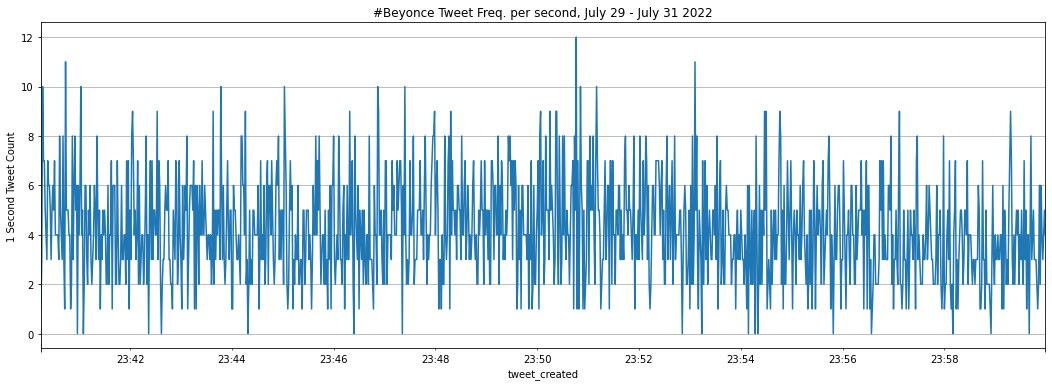

In [75]:
df_1S = df.groupby(pd.Grouper(key='tweet_created', freq='1S', convention='start')).size()
df_1S.plot(figsize=(18,6))
plt.ylabel('1 Second Tweet Count')
plt.title('#Beyonce Tweet Freq. per second, July 29 - July 31 2022')
plt.grid(True)

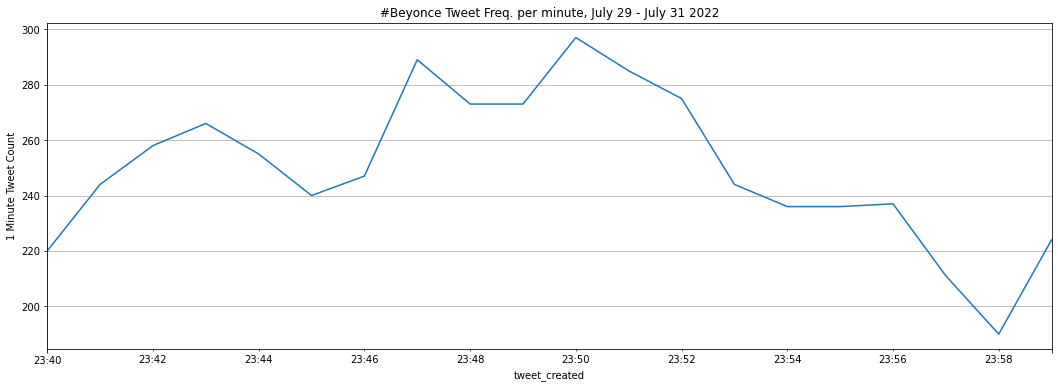

In [76]:
df_1min = df.groupby(pd.Grouper(key='tweet_created', freq='1Min', convention='start')).size()
df_1min.plot(figsize=(18,6))
plt.ylabel('1 Minute Tweet Count')
plt.title('#Beyonce Tweet Freq. per minute, July 29 - July 31 2022')
plt.grid(True)

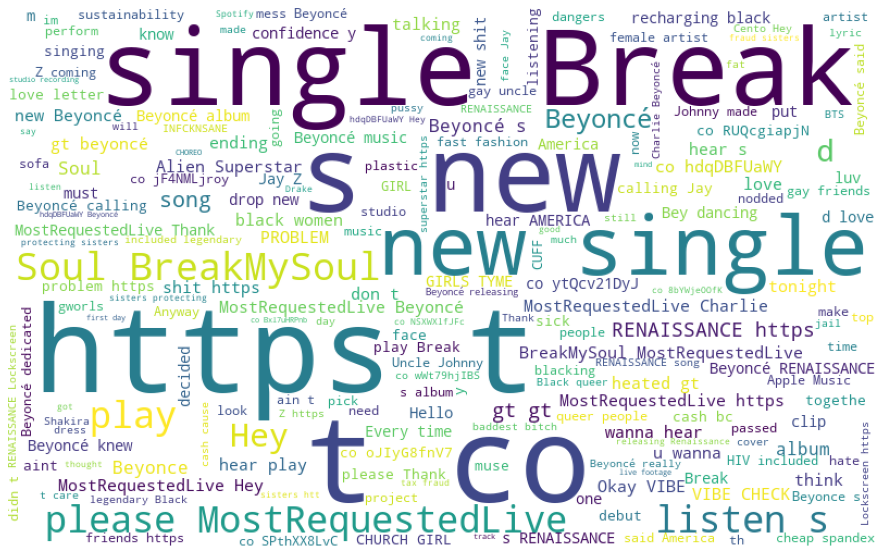

In [56]:
all_words = ' '.join([text for text in data['clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [57]:
from wordcloud import STOPWORDS

print(type(STOPWORDS))


<class 'set'>


In [69]:
stop_words = STOPWORDS.update(["https", "co", "RT", "t", "s"])


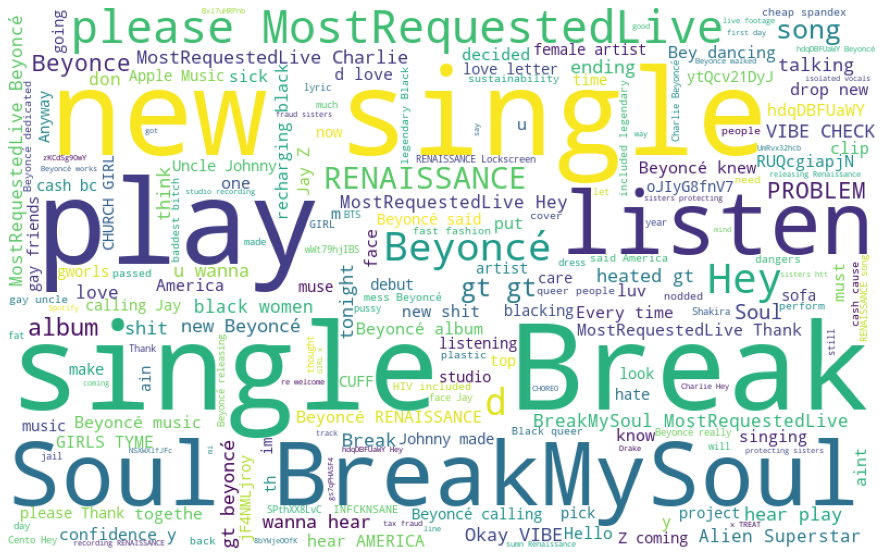

In [70]:
all_words = ' '.join([text for text in data['clean']])
wordcloud = WordCloud(stopwords = stop_words, background_color="white", width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure( figsize=(16,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [7]:
#https://www.dataquest.io/blog/matplotlib-tutorial/
def get_keywords(row):
    keywords = []
    text = row["tweet_text"].lower()
    if "Beyoncé" in text or "renaissance" in text:
        keywords.append("Beyoncé")
    if "Will" in text or "Smith" in text:
        keywords.append("Will")
    if "commonwealth" in text or "games" in text:
        keywords.append("CW22")
    return ",".join(keywords)
df["keyword"] = df.apply(get_keywords,axis=1)

In [118]:
import matplotlib.pyplot as plt
import numpy as np

In [120]:
counts = df["keyword"].value_counts()
print(counts)

                4935
CW22              45
Beyoncé           18
Beyoncé,CW22       2
Name: keyword, dtype: int64
